# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三次         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [5]:
df = pd.read_csv('Affairs.csv')
df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...
596,1,male,22.0,1.50,yes,1,12,2,5
597,7,female,32.0,10.00,yes,2,18,5,4
598,2,male,32.0,10.00,yes,2,17,6,5
599,2,male,22.0,7.00,yes,3,18,6,2


In [6]:
# 創建新的 "ynaffair" 列並將其初始化為 0
df['ynaffair'] = 0

# 將外遇一次以上的值設置為 1
df.loc[df['affairs'] > 0, 'ynaffair'] = 1

# 刪除affairs
df = df.drop('affairs', axis=1)
df.head()

,gender,age,yearsmarried,children,religiousness,education,occupation,rating,ynaffair
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         601 non-null    object 
 1   age            601 non-null    float64
 2   yearsmarried   601 non-null    float64
 3   children       601 non-null    object 
 4   religiousness  601 non-null    int64  
 5   education      601 non-null    int64  
 6   occupation     601 non-null    int64  
 7   rating         601 non-null    int64  
 8   ynaffair       601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [8]:
# 檢查是否有空值
df.isnull().sum()

gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
ynaffair         0
dtype: int64

In [9]:
# one-hot encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,yearsmarried,religiousness,education,occupation,rating,ynaffair,gender_female,gender_male,children_no,children_yes
0,37.0,10.00,3,18,7,4,0,0,1,1,0
1,27.0,4.00,4,14,6,4,0,1,0,1,0
2,32.0,15.00,1,12,1,4,0,1,0,0,1
3,57.0,15.00,5,18,6,5,0,0,1,0,1
4,22.0,0.75,2,17,6,3,0,0,1,1,0


In [10]:
X = df_dummies.drop(columns=['ynaffair'])
y = df_dummies['ynaffair'].values

In [13]:
X

,age,yearsmarried,religiousness,education,occupation,rating,gender_female,gender_male,children_no,children_yes
0,37.0,10.00,3,18,7,4,0,1,1,0
1,27.0,4.00,4,14,6,4,1,0,1,0
2,32.0,15.00,1,12,1,4,1,0,0,1
3,57.0,15.00,5,18,6,5,0,1,0,1
4,22.0,0.75,2,17,6,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
596,22.0,1.50,1,12,2,5,0,1,0,1
597,32.0,10.00,2,18,5,4,1,0,0,1
598,32.0,10.00,2,17,6,5,0,1,0,1
599,22.0,7.00,3,18,6,2,0,1,0,1


In [14]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# logistic

In [15]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

In [16]:
from sklearn import metrics
y_test_pred_log = model_log.predict(X_test)

# 準確度accuracy
print(metrics.accuracy_score(y_test, y_test_pred_log))

0.8264462809917356


Text(0.5, 25.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

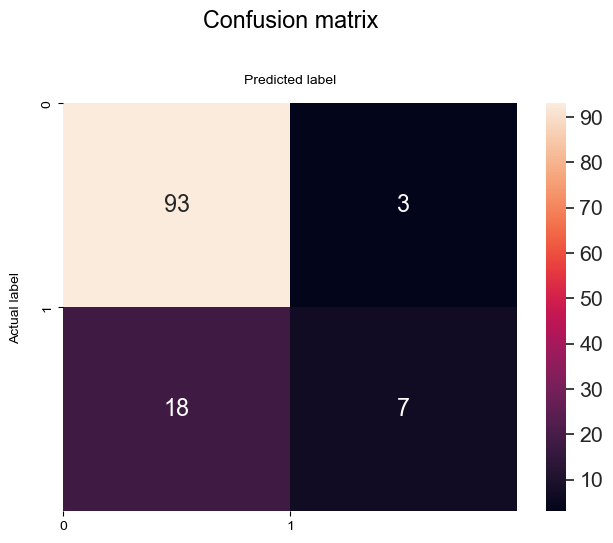

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

# 混淆矩陣 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_log)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(28, 20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [19]:
# TP=7, FP=3, FN=18, TN=93

# Accuracy : (TP + TN) / (TP + FP + TN + FN)
print(f'Accuracy : {round((7+93)/(7+3+18+93),3)}')
# Precision : TP / (TP + FP)
print(f'Precision : {round((7)/(7+3),3)}')
# Recall/Sensitivity : TP / (TP + FN)
print(f'Recall/Sensitivity : {round((7)/(7+18),3)}')
# Specificity : TN / (TN + FP)
print(f'Specificity : {round((93)/(93+3),3)}')

Accuracy : 0.826
Precision : 0.7
Recall/Sensitivity : 0.28
Specificity : 0.969


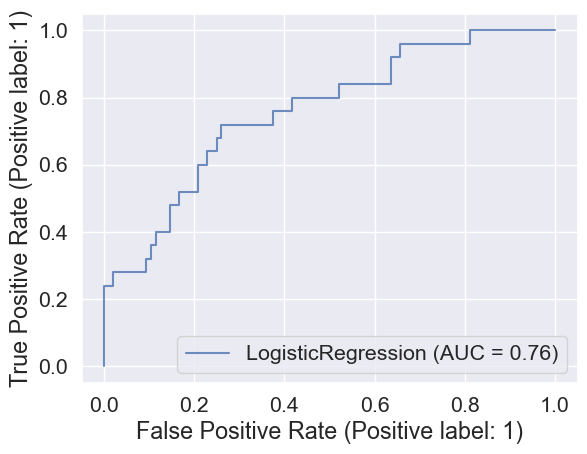

In [20]:
# ROC曲線
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()
# AUC越靠近1越好

AxesSubplot(0.125,0.11;0.775x0.77)


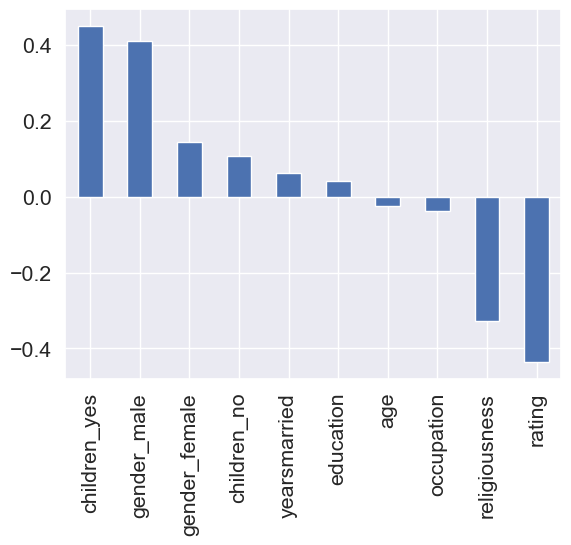

In [21]:
# 特徵權重係數，正相關、負相關
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

# Support Vector Machine（SVM）

In [22]:
from sklearn.svm import SVC

# SVC選擇Gaussian Kernel 高斯核函數
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.7933884297520661

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

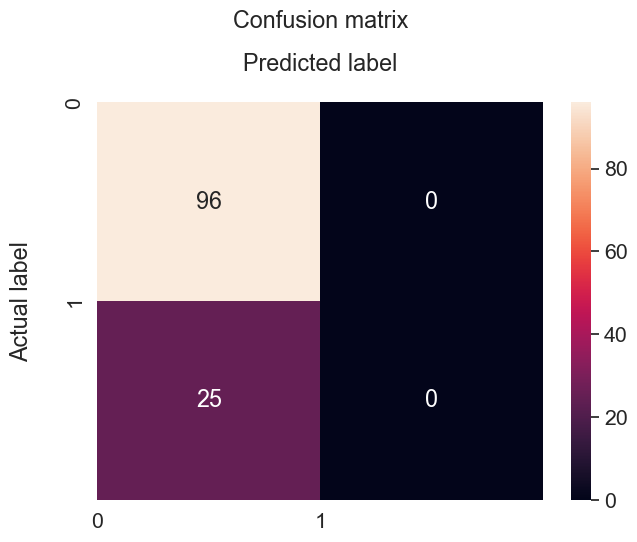

In [24]:
# SVM 混淆矩陣 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm)
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(28, 20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [29]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

print(f'Accuracy : {round((TP + TN)/(TP + FP + TN + FN),3)}')
print(f'Precision : {round(TP / (TP + FP),3)}')
print(f'Recall/Sensitivity : {round(TP / (TP + FN), 3)}')
print(f'Specificity : {round(TN / (TN + FP),3)}')

Accuracy : 0.793
Precision : nan
Recall/Sensitivity : 0.0
Specificity : 1.0


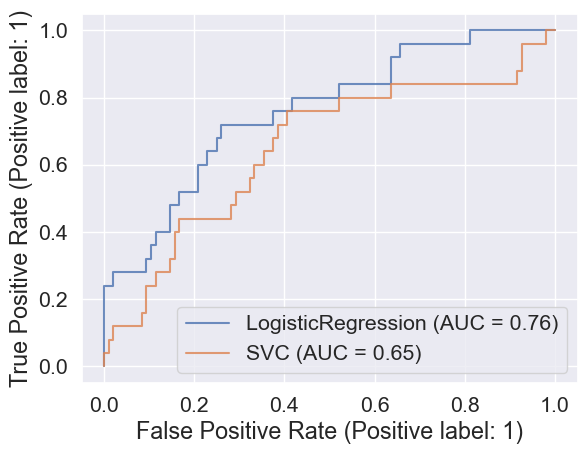

In [30]:
ax = plt.gca()
# 比較 logistic & SVC 的ROC取線
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()
# logistic效果較好

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

preprocessor = make_pipeline(SelectKBest(f_classif, k=10))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [32]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [35]:
# 選兩個參數進行調參(窮舉3*5=15次)
hyper_params_svm = {'svc__gamma':[0.001, 0.0001, 0.0005], 'svc__C':[1, 10, 100, 1000, 3000]}

In [36]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV:網格搜索, cv:交叉驗證
grid_svm = GridSearchCV(SVM, hyper_params_svm, scoring='recall', cv=3)
grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)

{'svc__C': 1, 'svc__gamma': 0.001}


In [37]:
y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

0.7933884297520661

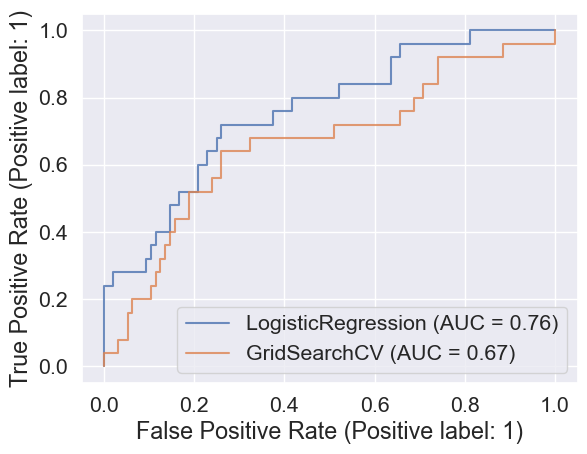

In [39]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='gini')
clf = model_dt.fit(X_train, y_train)

y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.6859504132231405


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

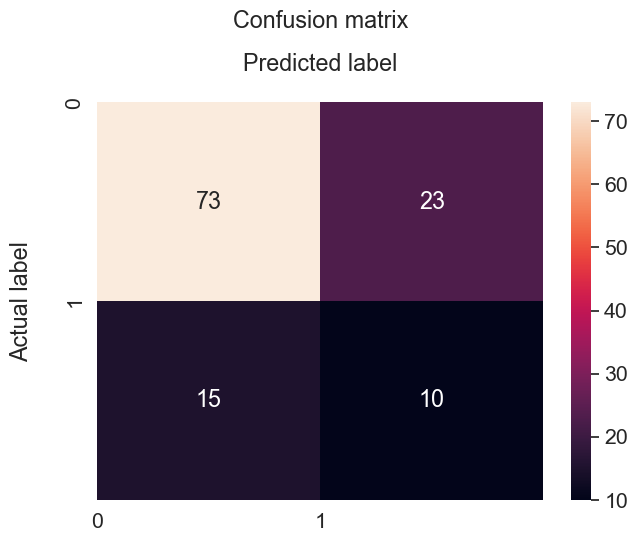

In [41]:
# Decision Tree 混淆矩陣 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [42]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

print(f'Accuracy : {round((TP + TN)/(TP + FP + TN + FN),3)}')
print(f'Precision : {round(TP / (TP + FP),3)}')
print(f'Recall/Sensitivity : {round(TP / (TP + FN), 3)}')
print(f'Specificity : {round(TN / (TN + FP),3)}')

Accuracy : 0.686
Precision : 0.303
Recall/Sensitivity : 0.4
Specificity : 0.76


In [43]:
# 挑選出K個分數最高的特徵
preprocessor = make_pipeline(SelectKBest(f_classif, k=8))
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))

In [45]:
DecisionTree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [46]:
# 剪枝的參數調整
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [47]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_samples_leaf': 10}


In [48]:
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)

0.7355371900826446

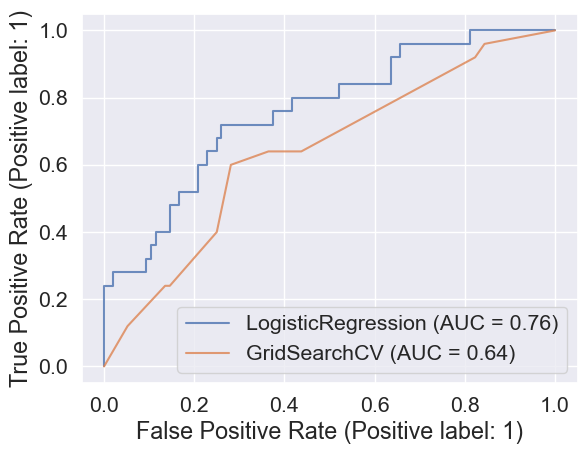

In [50]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_rf))

0.743801652892562


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

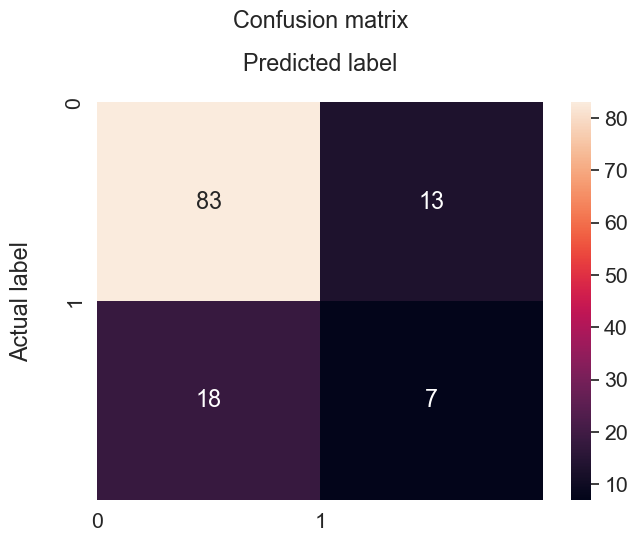

In [53]:
# Decision Tree 混淆矩陣 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [54]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

print(f'Accuracy : {round((TP + TN)/(TP + FP + TN + FN),3)}')
print(f'Precision : {round(TP / (TP + FP),3)}')
print(f'Recall/Sensitivity : {round(TP / (TP + FN), 3)}')
print(f'Specificity : {round(TN / (TN + FP),3)}')

Accuracy : 0.744
Precision : 0.35
Recall/Sensitivity : 0.28
Specificity : 0.865


<AxesSubplot:>

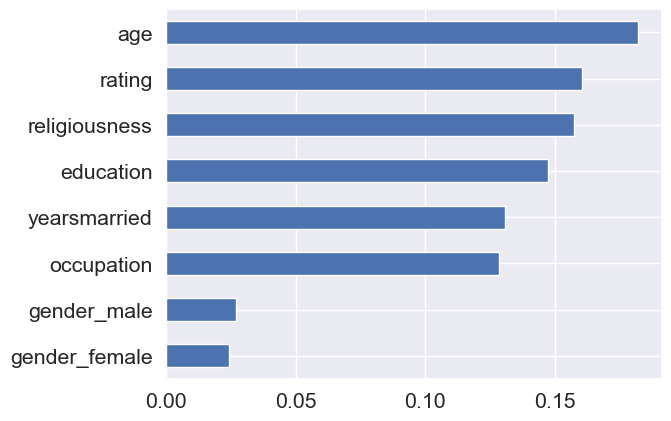

In [55]:
importances = model_rf.feature_importances_
weights = pd.Series(importances, index=X.columns.values)
weights.sort_values()[-8:].plot(kind = 'barh')

In [56]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [58]:
RandomForest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [59]:
hyper_params_rf = {'randomforestclassifier__n_estimators':[10, 50, 100, 150, 200],
                   'randomforestclassifier__max_depth':[5, 10, 15, 20],
                   'randomforestclassifier__max_leaf_nodes':[10, 20, 30]
                  }

In [60]:
grid_rf = GridSearchCV(RandomForest, hyper_params_rf, scoring='recall', cv=3)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_leaf_nodes': 30, 'randomforestclassifier__n_estimators': 10}


In [61]:
y_test_pred_gridrf = grid_rf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridrf)

0.8099173553719008

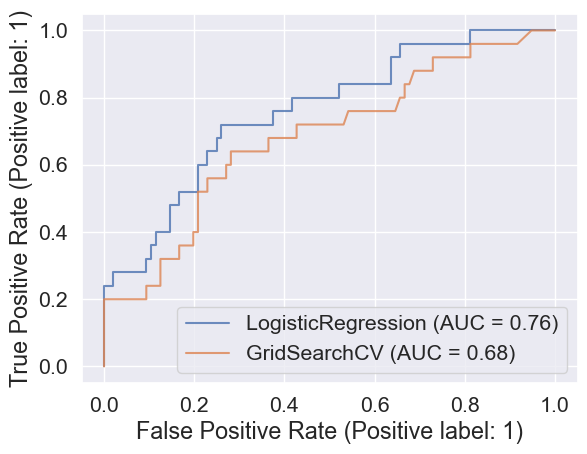

In [64]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# XgBoost

In [67]:
!pip install xgboost

In [70]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_xg)

0.7272727272727273

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

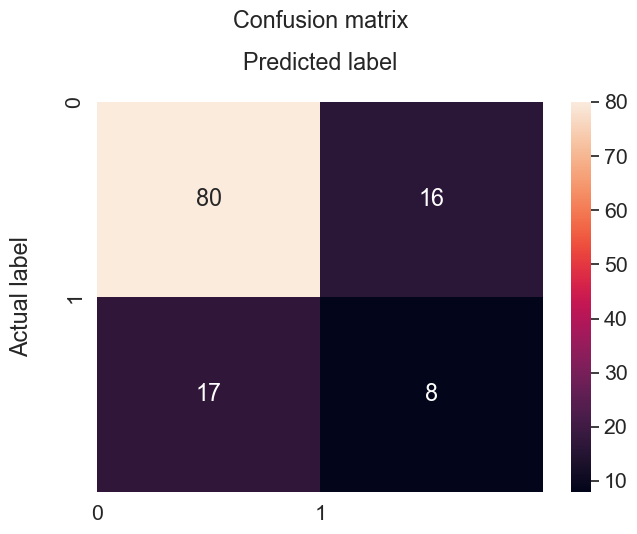

In [71]:
# Decision Tree 混淆矩陣 Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xg)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names = [0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [72]:
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[0,0]

print(f'Accuracy : {round((TP + TN)/(TP + FP + TN + FN),3)}')
print(f'Precision : {round(TP / (TP + FP),3)}')
print(f'Recall/Sensitivity : {round(TP / (TP + FN), 3)}')
print(f'Specificity : {round(TN / (TN + FP),3)}')

Accuracy : 0.727
Precision : 0.333
Recall/Sensitivity : 0.32
Specificity : 0.833


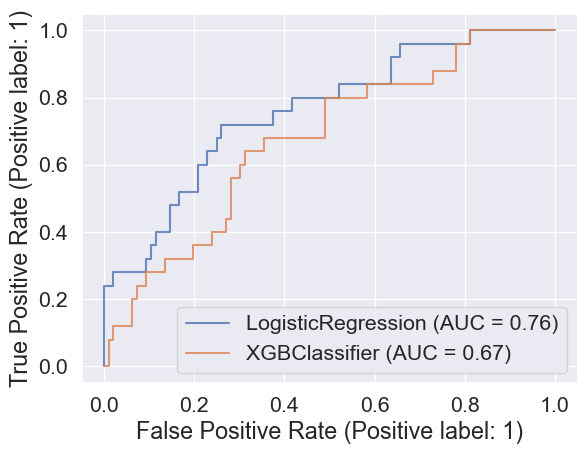

In [73]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()